# Practica 2.1 Analisis estadistico de señales
Por Miguel López Vélez cc 1001014378

Andrés David Medina Herrera cc 1003562902

Andrés Ruiz Trujillo


In [ ]:
!pip install pingouin

In [36]:
#libreria para manejo de NDARRAY
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import spacy
from google.colab import files
from google.colab import drive
import scipy.stats as stats
import pingouin as pg


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import os
#ruta_carpeta = '/content/gdrive/MyDrive/senales_parkinson/control/'  #ruta de ruiz descomentar cuando el lo haga
ruta_carpeta="/content/gdrive/MyDrive/Colab Notebooks/Datos/control" #ruta miguel 
#ruta_carpeta="/content/gdrive/MyDrive/senales_parkinson/control/" #Ruta de MEDINA
# Obtener la lista de archivos en la carpeta
lista_archivos = os.listdir(ruta_carpeta)


# Crear una matriz vacía para almacenar los datos
datos_matriz = []  # num_columnas es el número de columnas en los datos

# Iterar a través de cada archivo y agregar los datos a la matriz
for archivo in lista_archivos:
    # Verificar que el archivo sea de tipo .mat
    if archivo.endswith('.mat'):
        # Cargar los datos del archivo
        mat_contents = sio.loadmat(os.path.join(ruta_carpeta, archivo))
        data = mat_contents['data']
        senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
        # Agregar los datos a la matriz
        datos_matriz.append(senal_continua)

#ruta_carpeta = '/content/gdrive/MyDrive/senales_parkinson/parkinson/' #Ruta ruiz
ruta_carpeta="/content/gdrive/MyDrive/Colab Notebooks/Datos/parkinson"
#ruta_carpeta='/content/gdrive/MyDrive/senales_parkinson/parkinson/' #ruta MEDINA
lista_archivos = os.listdir(ruta_carpeta)
datos_parkinson=[]
for archivo in lista_archivos:
    # Verificar que el archivo sea de tipo .mat
    if archivo.endswith('.mat'):
        # Cargar los datos del archivo
        mat_contents = sio.loadmat(os.path.join(ruta_carpeta, archivo))
        data = mat_contents['data']
        senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
        # Agregar los datos a la matriz
        datos_parkinson.append(senal_continua)
    

In [8]:
datospromedio=[]
for paciente in datos_matriz:
  promcanales=[]
  for canal in paciente:
    e=canal**2
    prom=np.mean(e)
    promcanales.append(prom)
  datospromedio.append(promcanales)

datospromedio_p=[]
for paciente in datos_parkinson:
  promcanales=[]
  for canal in paciente:
    e=canal**2
    prom=np.mean(e)
    promcanales.append(prom)
  datospromedio_p.append(promcanales) 

In [9]:
import pandas as pd
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2'] #Los nombres de las columnas
df=pd.DataFrame(columns=names) #Se crea el data frame
con=1 
for paciente in datospromedio: #Se inspecciona cada paciente, en este caso pandas toma las listas así que solo se coloca paciente (lista con primedio de cada canal) y el contador para identificar el paciente
    df.loc[con]=paciente
    con+=1
df.index.name="Paciente"
df #Se muestra el dataframe

,C3,C1,CZ,C2,C4,O1,OZ,O2
Paciente,,,,,,,,
1,7.983201,8.808905,10.402469,9.827200,8.339491,46.947025,33.431248,37.842563
2,7.074337,9.142000,14.374966,7.135363,14.393723,7.330709,7.970077,9.749949
3,10.732825,10.492954,11.380075,9.252820,14.865082,12.622079,11.390664,12.329300
4,2.457531,3.052925,2.583776,2.068859,2.051998,10.179793,8.799481,11.146115
5,15.625254,12.111388,14.149056,12.689389,16.539726,120.417551,78.015020,139.047679
6,17.655651,17.458343,19.400215,17.713516,17.952736,53.299064,53.442788,56.260375
7,4.566518,4.607078,5.813206,5.404811,5.233940,23.168437,22.847901,25.043181
8,14.275562,13.102420,8.691999,8.622303,13.103186,41.685309,25.560553,33.926174
9,6.590055,6.962609,8.109497,6.162442,7.030150,12.883512,10.967880,11.413891


In [10]:
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2'] #Lo mismo de arriba pero con parkinson
dfp=pd.DataFrame(columns=names)
con=1
for paciente in datospromedio_p:
    dfp.loc[con]=paciente
    con+=1
dfp.index.name="Paciente parkinson"
dfp

,C3,C1,CZ,C2,C4,O1,OZ,O2
Paciente parkinson,,,,,,,,
1,19.046051,21.787690,20.989997,20.857644,23.256869,125.824697,89.672719,131.180590
2,11.871163,11.035004,12.270158,10.901968,11.297170,64.157132,64.444243,76.399642
3,8.997830,6.000801,6.143172,7.392954,8.529217,31.991725,26.857730,33.201820
4,6.219122,5.630588,5.409817,4.744892,6.045530,11.399107,11.850310,12.803033
5,5.346474,5.420594,6.077195,12.080843,7.394587,21.651413,21.280471,19.521987
6,24.461937,32.162385,42.587957,39.043613,32.896313,229.315772,200.133319,277.063790
7,8.101208,6.562124,6.994337,6.376014,7.892362,25.365117,25.371119,36.847031
8,24.287259,25.903265,36.585976,29.853850,28.276088,143.552881,111.372897,176.656149
9,11.723026,13.045671,18.320266,12.830111,15.665275,46.848064,33.845454,55.562172


In [11]:
from statsmodels.stats.diagnostic import lilliefors

def check_normality(data):
    '''Check if the distribution is normal.'''
    
    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus']    = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk']    = stats.shapiro(data)
       
    print('p-values for all {0} data points: ----------------'.format(len(data)))
    print(pVals)
    print('p-values for the first 100 data points: ----------------')
    
    if pVals['Omnibus'] > 0.05:
        print('Data are normally distributed')
    elif pVals['Shapiro-Wilk'] > 0.05:
        print('Data are normally distributed')
    else:
        print("Data arent normally distribuited")
    # --- >>> STOP stats <<< ---
    
    return pVals['Shapiro-Wilk']

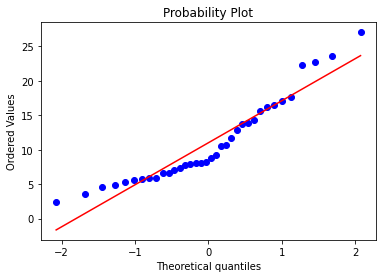

<ipython-input-11-b641d7278624>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 36 data points: ----------------
Omnibus         0.058516
Shapiro-Wilk    0.006252
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


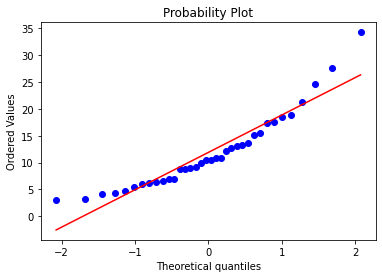

p-values for all 36 data points: ----------------
Omnibus         0.002250
Shapiro-Wilk    0.003954
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


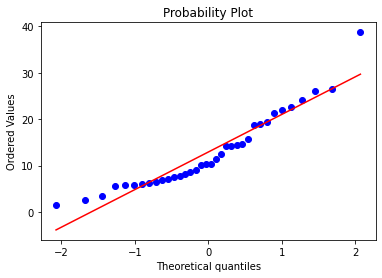

p-values for all 36 data points: ----------------
Omnibus         0.010169
Shapiro-Wilk    0.008902
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


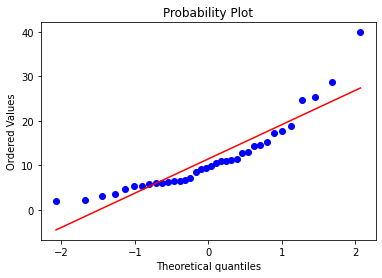

p-values for all 36 data points: ----------------
Omnibus         0.000039
Shapiro-Wilk    0.000197
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


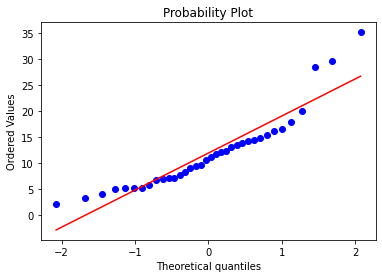

p-values for all 36 data points: ----------------
Omnibus         0.000401
Shapiro-Wilk    0.000800
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


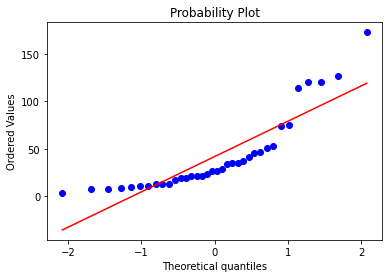

p-values for all 36 data points: ----------------
Omnibus         0.000124
Shapiro-Wilk    0.000006
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


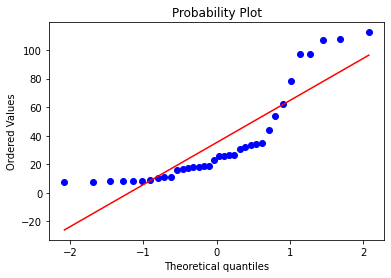

p-values for all 36 data points: ----------------
Omnibus         0.003589
Shapiro-Wilk    0.000004
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


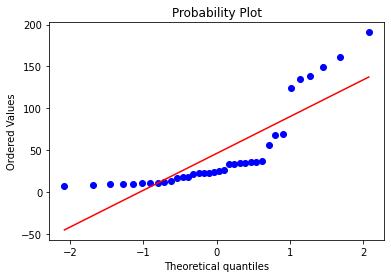

p-values for all 36 data points: ----------------
Omnibus         3.132373e-04
Shapiro-Wilk    5.307714e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


In [12]:
for i in names: #Se aplica la prueba de normalidad a cada canal de los pacientes control
    c=df.loc[:,i]
    x=check_normality(c)

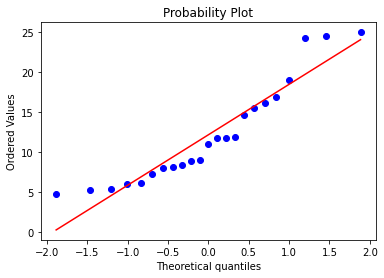

<ipython-input-11-b641d7278624>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.194145
Shapiro-Wilk    0.014392
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


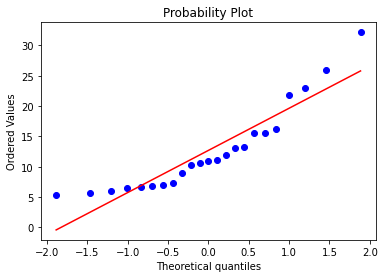

p-values for all 23 data points: ----------------
Omnibus         0.015444
Shapiro-Wilk    0.004522
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


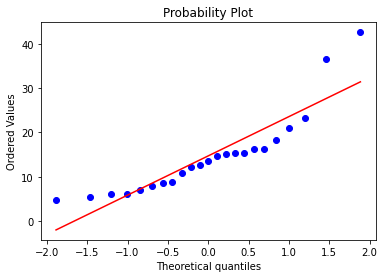

p-values for all 23 data points: ----------------
Omnibus         0.000374
Shapiro-Wilk    0.000910
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


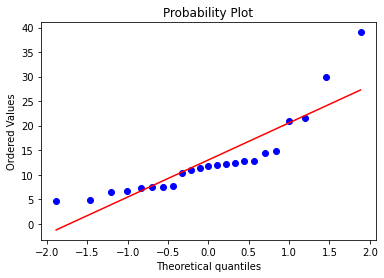

p-values for all 23 data points: ----------------
Omnibus         0.000084
Shapiro-Wilk    0.000312
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


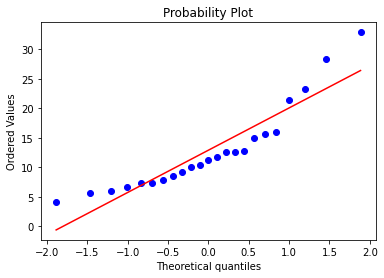

p-values for all 23 data points: ----------------
Omnibus         0.008114
Shapiro-Wilk    0.005323
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


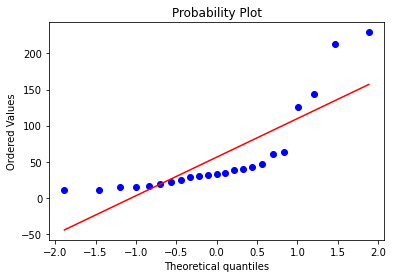

p-values for all 23 data points: ----------------
Omnibus         0.000158
Shapiro-Wilk    0.000010
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


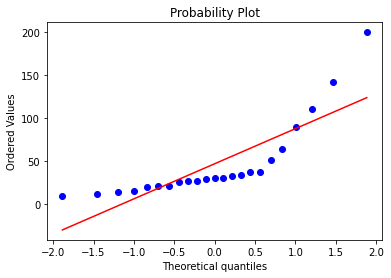

p-values for all 23 data points: ----------------
Omnibus         0.000018
Shapiro-Wilk    0.000017
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


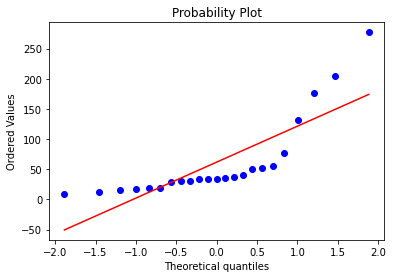

p-values for all 23 data points: ----------------
Omnibus         0.000057
Shapiro-Wilk    0.000009
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


In [13]:
for i in names: #Se aplica la prueba de normalidad a cada canal de los pacientes con parkinson
    c=dfp.loc[:,i]
    x=check_normality(c)

In [14]:
from scipy.stats import mannwhitneyu

In [15]:
stat, p = mannwhitneyu(datospromedio, datospromedio_p)
con=0
for i in p: #solo imprimo los resultados de cada canal despues de pasar por la prueba no parametrica
    print('Statistics=%.3f, p=%.3f for channel %s' % (stat[con], i,names[con]))
    con+=1
    #interpret
    alpha = 0.05
    if i > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

Statistics=360.000, p=0.406 for channel C3
Same distribution (fail to reject H0)
Statistics=377.000, p=0.571 for channel C1
Same distribution (fail to reject H0)
Statistics=366.000, p=0.460 for channel CZ
Same distribution (fail to reject H0)
Statistics=337.000, p=0.234 for channel C2
Same distribution (fail to reject H0)
Statistics=376.000, p=0.560 for channel C4
Same distribution (fail to reject H0)
Statistics=344.000, p=0.280 for channel O1
Same distribution (fail to reject H0)
Statistics=313.000, p=0.118 for channel OZ
Same distribution (fail to reject H0)
Statistics=321.000, p=0.151 for channel O2
Same distribution (fail to reject H0)


#Normalización

Debido a que los datos no estaba normalmente distribuidos y como se vió en clase esto puede arreglarse con una transformación se procede a hacer la normalización de estos.

In [24]:
datospromedio=[] #Lista para almacenar los datos
for paciente in datos_matriz:
  promcanales=[]
  for canal in paciente:
    canal = canal - np.min(canal) + 0.1
    canal_transformado = np.log(canal)
    e=canal_transformado**2 #Se eleva al cuadrado el voltaje para así obtener la energia
    #e=canal**2 #Se eleva al cuadrado el voltaje para así obtener la energia
    prom=np.mean(e)
    promcanales.append(prom) #Se agrega a la lista de reserva
  datospromedio.append(promcanales) #La lista de reserva se agrega al total de los datos siendo cada entrada el promedio de cada canal
  
datospromedio_p=[]#li mismo de arriba pero con parkinson
for paciente in datos_parkinson:
  promcanales=[]
  for canal in paciente:
    canal = canal - np.min(canal) + 0.1
    canal_transformado = np.log(canal)
    e=canal_transformado**2 #Se eleva al cuadrado el voltaje para así obtener la energia
    #e=canal**2
    prom=np.mean(e)
    promcanales.append(prom)
  datospromedio_p.append(promcanales)  

In [17]:
import pandas as pd
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2'] #Los nombres de las columnas
df=pd.DataFrame(columns=names) #Se crea el data frame
con=1 
for paciente in datospromedio: #Se inspecciona cada paciente, en este caso pandas toma las listas así que solo se coloca paciente (lista con primedio de cada canal) y el contador para identificar el paciente
    df.loc[con]=paciente
    con+=1
df.index.name="Paciente"
df #Se muestra el dataframe

,C3,C1,CZ,C2,C4,O1,OZ,O2
Paciente,,,,,,,,
1,6.590386,6.514587,6.914735,6.462729,6.586765,12.733340,11.689665,12.077951
2,6.029490,6.440654,7.407225,5.780207,7.388992,6.905029,6.340705,6.880249
3,6.980380,7.079268,7.485375,6.701474,8.835204,7.438710,6.870378,7.118902
4,3.709816,3.767402,3.927173,3.690161,3.692060,7.760183,7.337528,7.536000
5,8.427508,7.686706,7.769533,7.721179,9.017301,14.526645,13.366861,15.837454
6,8.537489,8.717604,8.323412,7.677521,9.208576,13.093489,11.683635,12.325736
7,4.622522,5.397521,6.660252,6.445393,5.311957,9.922804,9.121003,9.454714
8,7.611227,7.400449,6.653139,7.331364,7.352586,12.415034,10.790959,11.182889
9,5.870401,5.675800,6.478295,6.475574,6.229916,8.830804,8.326750,7.856687


In [18]:
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2'] #Lo mismo de arriba pero con parkinson
dfp=pd.DataFrame(columns=names)
con=1
for paciente in datospromedio_p:
    dfp.loc[con]=paciente
    con+=1
dfp.index.name="Paciente parkinson"
dfp

,C3,C1,CZ,C2,C4,O1,OZ,O2
Paciente parkinson,,,,,,,,
1,9.179805,9.599791,9.166529,9.323081,9.523497,14.786320,13.716498,15.406492
2,7.283722,7.055502,6.738267,6.908504,7.139560,11.965505,12.965804,13.712946
3,6.412620,5.589264,6.205986,6.470669,6.771938,10.202416,9.324920,10.472830
4,5.657476,5.118261,5.497640,5.502219,6.412526,7.626900,7.406504,7.448835
5,5.145838,5.798310,6.228971,6.647687,6.064771,9.942456,9.676162,8.711985
6,9.329625,9.628991,10.097978,10.470242,10.353917,16.856567,15.476016,16.634454
7,6.882336,6.252851,5.837724,5.635760,6.934153,9.656062,9.219507,11.874165
8,9.779515,9.104692,9.963188,10.004139,9.908504,14.957113,13.930431,16.314348
9,7.225843,7.900136,9.059994,8.007410,8.347411,11.897736,10.223510,13.220013


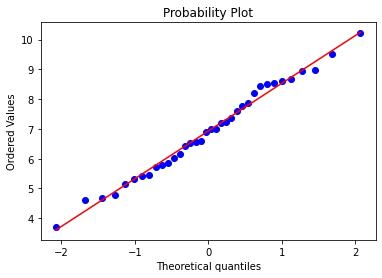

<ipython-input-11-b641d7278624>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 36 data points: ----------------
Omnibus         0.627888
Shapiro-Wilk    0.922883
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


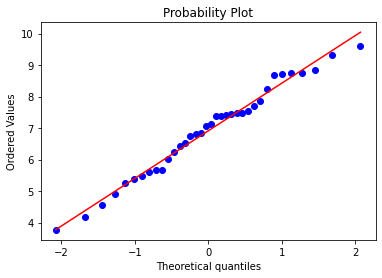

p-values for all 36 data points: ----------------
Omnibus         0.645158
Shapiro-Wilk    0.655650
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


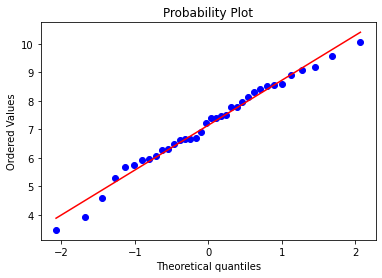

p-values for all 36 data points: ----------------
Omnibus         0.620990
Shapiro-Wilk    0.841919
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


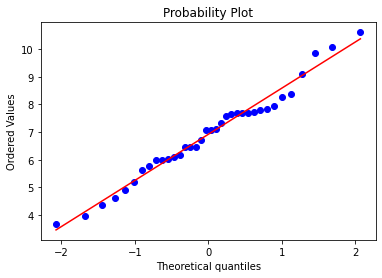

p-values for all 36 data points: ----------------
Omnibus         0.892301
Shapiro-Wilk    0.677774
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


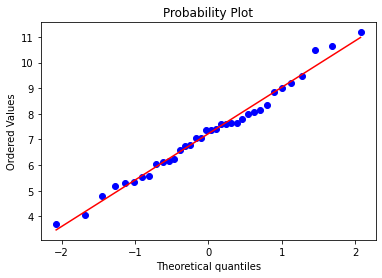

p-values for all 36 data points: ----------------
Omnibus         0.809944
Shapiro-Wilk    0.864910
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


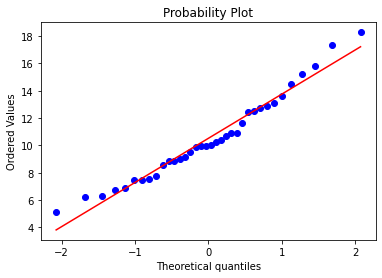

p-values for all 36 data points: ----------------
Omnibus         0.274421
Shapiro-Wilk    0.293116
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


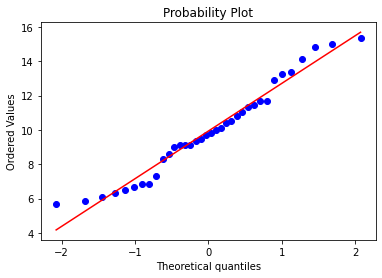

p-values for all 36 data points: ----------------
Omnibus         0.476647
Shapiro-Wilk    0.205377
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


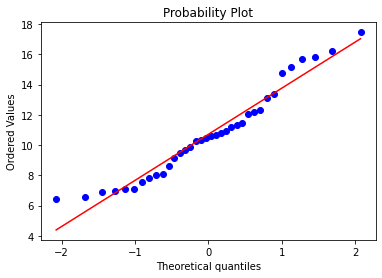

p-values for all 36 data points: ----------------
Omnibus         0.333924
Shapiro-Wilk    0.088650
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


In [19]:
for i in names: #Se aplica la prueba de normalidad a cada canal de los pacientes control
    c=df.loc[:,i]
    x=check_normality(c)

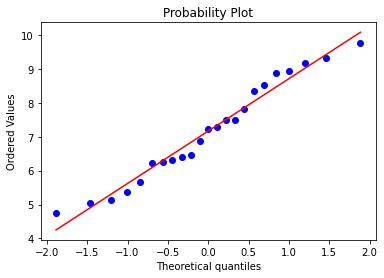

<ipython-input-11-b641d7278624>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.284345
Shapiro-Wilk    0.452234
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


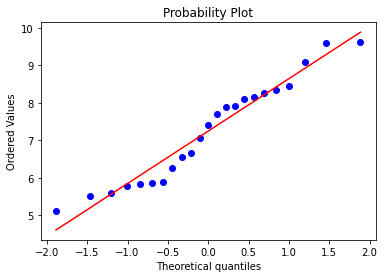

p-values for all 23 data points: ----------------
Omnibus         0.210039
Shapiro-Wilk    0.182683
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


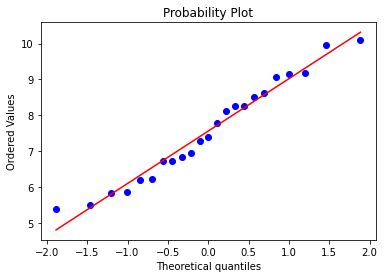

p-values for all 23 data points: ----------------
Omnibus         0.328749
Shapiro-Wilk    0.453008
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


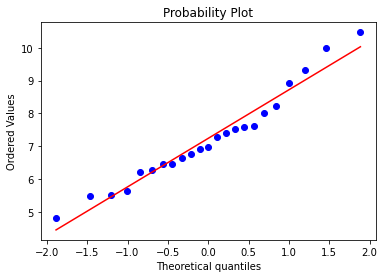

p-values for all 23 data points: ----------------
Omnibus         0.372498
Shapiro-Wilk    0.458239
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


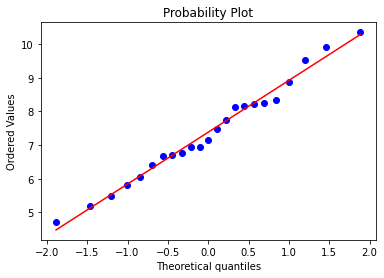

p-values for all 23 data points: ----------------
Omnibus         0.852068
Shapiro-Wilk    0.914932
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


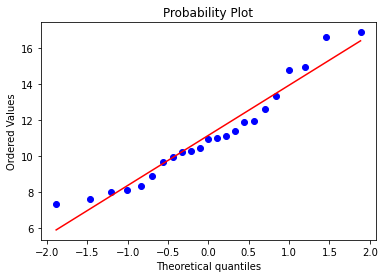

p-values for all 23 data points: ----------------
Omnibus         0.363166
Shapiro-Wilk    0.170789
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


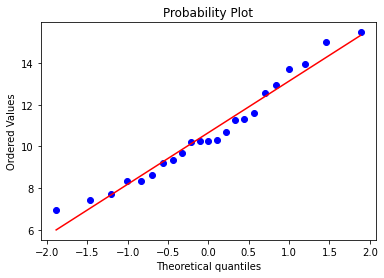

p-values for all 23 data points: ----------------
Omnibus         0.534054
Shapiro-Wilk    0.488873
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


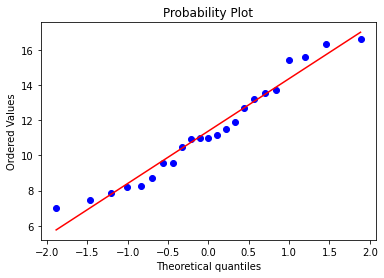

p-values for all 23 data points: ----------------
Omnibus         0.439501
Shapiro-Wilk    0.344292
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


In [20]:
for i in names: #Se aplica la prueba de normalidad a cada canal de los pacientes con parkinson
    c=dfp.loc[:,i]
    x=check_normality(c)

In [21]:
from scipy.stats import levene

In [29]:
#VERIFICANDO HOMOSEDASTICIDAD
con=0
for i in names:
  c=df.loc[:,i]
  p=dfp.loc[:,i] 
  p_valor = levene(c, p).pvalue
  print("Canal %s p=%.3f "% (names[con],p_valor))
  con+=1
  if p_valor > 0.05:
    print("Los datos son homocedásticos.")
  else:
    print("Los datos no son homocedásticos.")

Canal C3 p=0.871 
Los datos son homocedásticos.
Canal C1 p=0.981 
Los datos son homocedásticos.
Canal CZ p=0.882 
Los datos son homocedásticos.
Canal C2 p=0.493 
Los datos son homocedásticos.
Canal C4 p=0.525 
Los datos son homocedásticos.
Canal O1 p=0.469 
Los datos son homocedásticos.
Canal OZ p=0.485 
Los datos son homocedásticos.
Canal O2 p=0.889 
Los datos son homocedásticos.


Con esto en mente entonces procederos a hacer una prueba t donde comprobaremos si existe una relación entre los valores de la media de pacientes sanos con la presencia de parkinson

en otras palabras:

H0
 : no hay diferencia entre las medias poblacionales:  μ(contol)−μ(parkinson)=0
 
Ha
 : si hay diferencia entre las medias poblacionales:  μ(contol)−μ(parkinson)≠0
 


In [66]:
con=0
for i in names:
  c=df.loc[:,i]
  p=dfp.loc[:,i] 
  print("Canal:%s"%names[con])
  con+=1
  t=pg.ttest(x=c, y=p, alternative='two-sided', correction=False)
  p=t.loc["T-test","p-val"]
  alpha=0.05
  if p > alpha:
        print('Same distribution (fail to reject H0)')
  else:
        print('Different distribution (reject H0)')
  display(t)

Canal:C3
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.585009,57,two-sided,0.56085,"[-1.06, 0.58]",0.156161,0.311,0.088683


Canal:C1
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.888562,57,two-sided,0.377973,"[-1.1, 0.43]",0.237191,0.375,0.140973


Canal:CZ
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.059862,57,two-sided,0.293678,"[-1.21, 0.37]",0.282918,0.43,0.180678


Canal:C2
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.78776,57,two-sided,0.434101,"[-1.16, 0.5]",0.210283,0.349,0.121051


Canal:C4
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.358497,57,two-sided,0.721295,"[-1.05, 0.73]",0.095697,0.285,0.064352


Canal:O1
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.788191,57,two-sided,0.433851,"[-2.24, 0.98]",0.210398,0.349,0.121131


Canal:OZ
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.040415,57,two-sided,0.30254,"[-2.11, 0.67]",0.277727,0.423,0.175803


Canal:O2
Same distribution (fail to reject H0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.840271,57,two-sided,0.404267,"[-2.25, 0.92]",0.224301,0.362,0.131109


Finalmente obtenemos que 